In [1]:
'''PROGRAM LOGIC
-Merge into one dataframe
-Stats analysis
'''

'PROGRAM LOGIC\n-Merge into one dataframe\n-Stats analysis\n'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df_rc = pd.read_csv('pd_patients_redcap.csv')

In [3]:
df_g = pd.read_csv('pd_patients_google.csv')

In [4]:
display(df_rc.head(0))
display(df_g.head(0))

print(len(df_rc), len(df_g))

frames = [df_rc, df_g]

df_combo = pd.concat(frames, ignore_index=True)

display(df_combo.head(0))
print(len(df_combo))


,Record ID,What is your age?,What is your current employment status?,"If you are retired, what was your last job?",What is your job/profession?,What is your gender?&nbsp;,"Are you of Hispanic, Latino/a, or Spanish origin?",What is your race? (Check all that apply) (choice=White),What is your race? (Check all that apply) (choice=Black or African American),What is your race? (Check all that apply) (choice=American Indian or Alaska Native),...,How long have you been diagnosed with Parkinson's Disease?,How many people do you personally know with Parkinson's Disease?,How often do you make video calls or post videos online?,I would like to have the option to remove tremors from videos of myself.,I would like for viewers to have the option to remove tremors from a video of myself.,My tremors affect my level of confidence.,I feel like my tremors cause others to perceive me as less competent.,Would you like to be contacted in the future for a follow-up interview or other research projects?,What is your email? (optional),Complete?


,Timestamp,Username,What is your age?,What is your current employment status?,"If you are retired, what was your last job?",What is your job/profession?,What is your gender?,"Are you of Hispanic, Latino/a, or Spanish origin?",What is your race? (Check all that apply),What the highest level of education you have obtained?,...,How many people do you personally know with Parkinson’s Disease?,How often do you make video calls or post videos online?,I would like to have the option to remove tremors from videos of myself.,I would like for viewers to have the option to remove tremors from a video of myself.,My tremors affect my level of confidence.,I feel like my tremors cause others to perceive me as less competent.,What is your email? (optional),Would you like to be contacted in the future for a follow-up interview or other research projects?,Unnamed: 21,Unnamed: 22


101 76


,Record ID,What is your age?,What is your current employment status?,"If you are retired, what was your last job?",What is your job/profession?,What is your gender?&nbsp;,"Are you of Hispanic, Latino/a, or Spanish origin?",What is your race? (Check all that apply) (choice=White),What is your race? (Check all that apply) (choice=Black or African American),What is your race? (Check all that apply) (choice=American Indian or Alaska Native),...,Complete?,Timestamp,Username,What is your gender?,What is your race? (Check all that apply),What the highest level of education you have obtained?,Are you part of a Parkinson's Disease support group?,How many people do you personally know with Parkinson’s Disease?,Unnamed: 21,Unnamed: 22


177


In [5]:
for col in df_combo.columns:
    print(col)

Record ID
What is your age?
What is your current employment status?
If you are retired, what was your last job? 
What is your job/profession? 
What is your gender?&nbsp;
Are you of Hispanic, Latino/a, or Spanish origin?
What is your race? (Check all that apply)  (choice=White)
What is your race? (Check all that apply)  (choice=Black or African American)
What is your race? (Check all that apply)  (choice=American Indian or Alaska Native)
What is your race? (Check all that apply)  (choice=Asian)
What is your race? (Check all that apply)  (choice=Native Hawaiian or Pacific Islander)
What is your race? (Check all that apply)  (choice=Other)
What is the highest level of education you have obtained?
Are you part of a Parkinson's disease support group?
Have you taken on leadership or advocacy roles within the Parkinson's Disease community?
How long have you been diagnosed with Parkinson's Disease?
How many people do you personally know with Parkinson's Disease?
How often do you make video cal

In [6]:
#Self-contained cell for converting data into numerical format for strongly agree questions
str2int_dict = {'Strongly Agree':5.0, 'Agree':4.0, 'Undecided': 3.0,'Disagree':2.0, 'Strongly Disagree':1.0}
def str2int(st):
    if ((type(st) == str) and (st.endswith('agree') or st.endswith('Agree') or st.endswith('decided'))):
        return str2int_dict[st]
    else:
        return st



In [7]:
for col in df_combo.columns:
    df_combo[col] = df_combo[col].apply(str2int)


In [9]:
# Create an array of questions to analyze
q0 = "I would like to have the option to remove tremors from videos of myself."
q1 = "I would like for viewers to have the option to remove tremors from a video of myself."
q2 = "My tremors affect my level of confidence. " 
q3 = "I feel like my tremors cause others to perceive me as less competent. "

q_list = [q0, q1, q2, q3]

# There was a space in the google forms for q2 and q3

In [10]:
# This is to generate a table of distributions (counts) for each answer for each question
# 'Strongly Agree':5, 'Agree':4, 'Undecided': 3,'Disagree':2, 'Strongly Disagree':1
# str2int_dict2 = {'Always':5, 'Often':4, 'Sometimes': 3,'Rarely':2, 'Never':1}
df_counts = pd.DataFrame()
for q in q_list:
    col_name = q
    df_counts[col_name] = df_combo[col_name].value_counts() # applies function for every row in specified column
display(df_counts)

,I would like to have the option to remove tremors from videos of myself.,I would like for viewers to have the option to remove tremors from a video of myself.,My tremors affect my level of confidence.,I feel like my tremors cause others to perceive me as less competent.
3.0,63,59,30,30
4.0,57,61,55,71
2.0,22,16,44,31
5.0,19,18,16,19
1.0,9,16,20,14


In [11]:
# here we create a dataframe containing only disagree and agree sums
# Keep in mind there is a frequency question... close enough ?
df_agree = df_counts.loc[[4.0, 5.0],:].sum()
df_disagree = df_counts.loc[[1.0,2.0],:].sum()
df_neutral = df_counts.loc[[3.0],:].sum()
df_AD = pd.concat([df_agree, df_disagree], axis=1)
df_AD.columns = ['Agree','Disagree']
print("Count for those who AGREED to the questions: ")
display(df_agree)
print("Count for those who DISAGREED to the questions: ")
display(df_disagree)
display(df_AD)

Count for those who AGREED to the questions: 


I would like to have the option to remove tremors from videos of myself.                 76
I would like for viewers to have the option to remove tremors from a video of myself.    79
My tremors affect my level of confidence.                                                71
I feel like my tremors cause others to perceive me as less competent.                    90
dtype: int64

Count for those who DISAGREED to the questions: 


I would like to have the option to remove tremors from videos of myself.                 31
I would like for viewers to have the option to remove tremors from a video of myself.    32
My tremors affect my level of confidence.                                                64
I feel like my tremors cause others to perceive me as less competent.                    45
dtype: int64

,Agree,Disagree
I would like to have the option to remove tremors from videos of myself.,76,31
I would like for viewers to have the option to remove tremors from a video of myself.,79,32
My tremors affect my level of confidence.,71,64
I feel like my tremors cause others to perceive me as less competent.,90,45


In [12]:
# testing for population differences on all questions
# statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, 
#                   alternative='two-sided', prop_var=False)
# Returns statistic and p-value
# Null Hypothesis = There is no difference in public opinion. 
    # E.g., Number who agree is equal to the number who disagree

for q in q_list:
    print(q)
    row_ID = q
    num_agree = df_AD.loc[row_ID,'Agree']
    num_disagree = df_AD.loc[row_ID,'Disagree']
    t, p = proportions_ztest(num_agree, (num_agree+num_disagree), value=.5) # Assume no difference 
    print("T: ", t, "P: ", p)
    print("\n==========================\n")

I would like to have the option to remove tremors from videos of myself.
T:  4.79497960077169 P:  1.6269138550665999e-06


I would like for viewers to have the option to remove tremors from a video of myself.
T:  4.924258200898274 P:  8.468096480949749e-07


My tremors affect my level of confidence. 
T:  0.6032756097072094 P:  0.5463253557295227


I feel like my tremors cause others to perceive me as less competent. 
T:  4.107919181288745 P:  3.992397476901354e-05




In [13]:
# self-contained cell to determine interval for 95% of distr
# 95 % of a distribution falls between 2 standard-deviations of the mean
# params = (mu, std)
# returns list [mu-std, mu, mu+std]
def compute_interval95(mu, std):
    lower_bound = mu - (2*std)
    upper_bound = mu + (2*std)
    ret_list = [lower_bound, mu, upper_bound]
    return ret_list

In [14]:
# self-contained cell for determining overlap of confidence intervals
# Used to determine DIFFERENCE of opinoin betweeen 2 groups
# params =[interval_list1, interval_list2]
# Returns TRUE if NO overlap bc no overlap means difference
def is_difference(interval_list1, interval_list2):
    lower_bound1 = interval_list1[0]
    upper_bound1 = interval_list1[-1]
    lower_bound2 = interval_list2[0]
    upper_bound2 = interval_list2[-1]
    if ((lower_bound2 >= upper_bound1) or (upper_bound2 <= lower_bound1)):
        return True # distributions do not overlap
    else:
        return False # distributinos overlap!

I would like to have the option to remove tremors from videos of myself.
Male


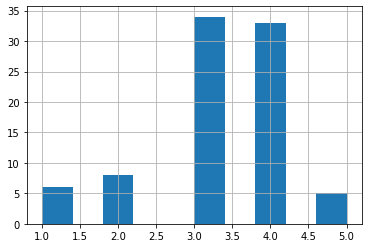

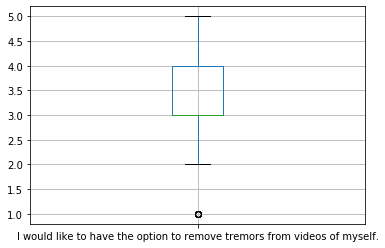

Female


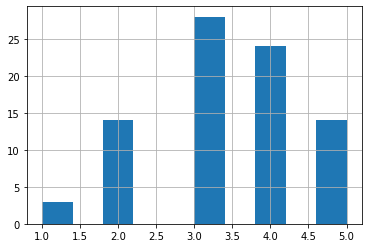

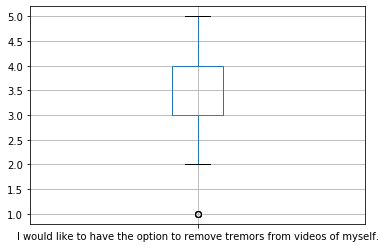

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,36.0,3.277778,1.111270,1.0,2.75,3.0,4.0,5.0
Genderqueer/gender-non-conforming,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Male,39.0,3.230769,0.841726,1.0,3.00,3.0,4.0,5.0


,count,mean,std,min,25%,50%,75%,max
What is your gender?&nbsp;,,,,,,,,
Female,47.0,3.468085,1.039462,1.0,3.0,3.0,4.0,5.0
Male,47.0,3.297872,1.061478,1.0,3.0,3.0,4.0,5.0


p-value =  0.1808696711420913
u-value=  4.107919181288745
Male:  [1.3411673432345437, 3.2674418604651163, 5.193716377695689]
Female:  [1.2480413416611986, 3.3855421686746987, 5.523042995688199]
There is a Difference:  False


I would like for viewers to have the option to remove tremors from a video of myself.
Male


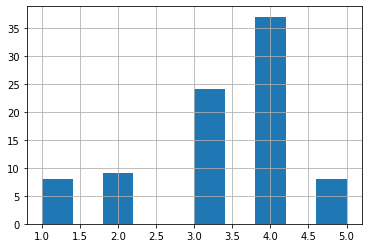

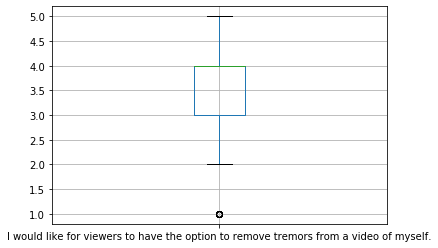

Female


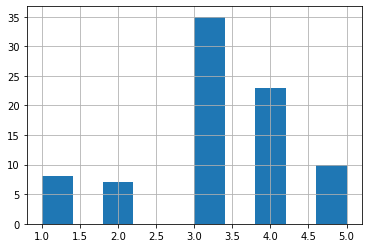

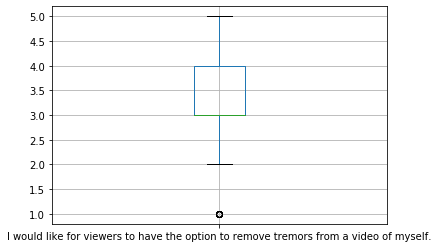

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,36.0,3.25000,1.079021,1.0,3.0,3.0,4.0,5.0
Genderqueer/gender-non-conforming,1.0,4.00000,NaN,4.0,4.0,4.0,4.0,4.0
Male,39.0,3.25641,1.018718,1.0,3.0,3.0,4.0,5.0


,count,mean,std,min,25%,50%,75%,max
What is your gender?&nbsp;,,,,,,,,
Female,47.0,3.234043,1.107539,1.0,3.0,3.0,4.0,5.0
Male,47.0,3.382979,1.152562,1.0,3.0,4.0,4.0,5.0


p-value =  0.3654513978737047
u-value=  4.107919181288745
Male:  [1.1467126016289764, 3.3255813953488373, 5.504450189068699]
Female:  [1.0636896265103903, 3.2409638554216866, 5.418238084332983]
There is a Difference:  False


My tremors affect my level of confidence. 
Male


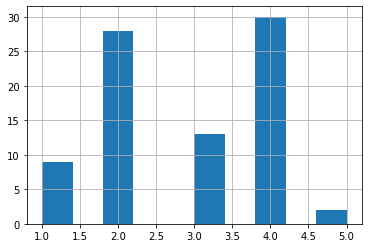

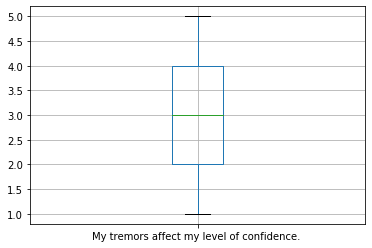

Female


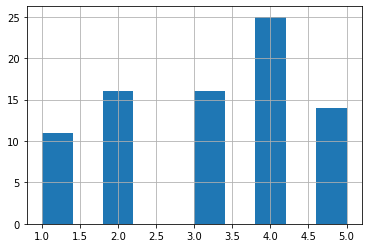

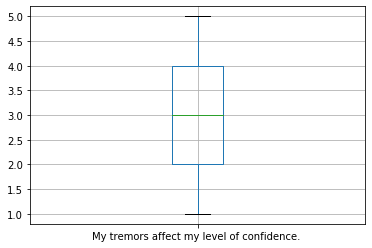

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,35.0,3.057143,1.327157,1.0,2.0,3.0,4.0,5.0
Genderqueer/gender-non-conforming,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
Male,35.0,2.885714,1.131668,1.0,2.0,3.0,4.0,5.0


,count,mean,std,min,25%,50%,75%,max
What is your gender?&nbsp;,,,,,,,,
Female,47.0,3.276596,1.297190,1.0,2.0,4.0,4.0,5.0
Male,47.0,2.829787,1.109625,1.0,2.0,3.0,4.0,5.0


p-value =  0.06348255388453572
u-value=  4.107919181288745
Male:  [0.6287279377062984, 2.8536585365853657, 5.0785891354644335]
Female:  [0.5699856496874327, 3.182926829268293, 5.795868008849153]
There is a Difference:  False


I feel like my tremors cause others to perceive me as less competent. 
Male


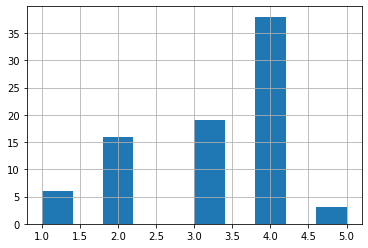

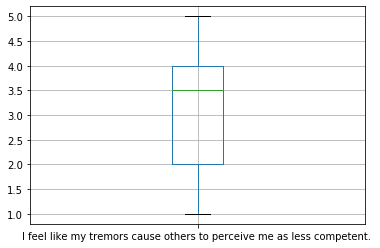

Female


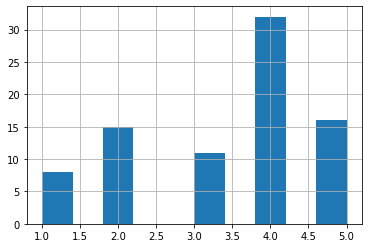

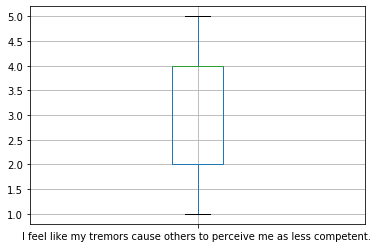

,count,mean,std,min,25%,50%,75%,max
What is your gender?,,,,,,,,
Female,35.0,3.314286,1.278129,1.0,2.0,4.0,4.0,5.0
Genderqueer/gender-non-conforming,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0
Male,35.0,3.257143,0.918530,1.0,3.0,3.0,4.0,5.0


,count,mean,std,min,25%,50%,75%,max
What is your gender?&nbsp;,,,,,,,,
Female,47.0,3.468085,1.265788,1.0,2.0,4.0,4.0,5.0
Male,47.0,3.148936,1.122472,1.0,2.0,4.0,4.0,5.0


p-value =  0.09551474044770458
u-value=  4.107919181288745
Male:  [1.1238242869879218, 3.1951219512195124, 5.2664196154511025]
Female:  [0.8714507121303581, 3.402439024390244, 5.93342733665013]
There is a Difference:  False




In [19]:
# Gender Cell
# Compute the Mann-Whitney rank test on samples x and y
# scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

g1 = df.groupby('What is your gender?')
g2 = df.groupby('What is your gender?&nbsp;')

df_male = df[(df['What is your gender?'] == 'Male') | (df['What is your gender?&nbsp;'] == 'Male')].copy()
df_female = df[(df['What is your gender?'] == 'Female') | (df['What is your gender?&nbsp;'] == 'Female')].copy()

for q in q_list:
    col_name = q
    print(col_name)
    print("Male")
    df_male[col_name].hist()
    plt.show()
    df_male.boxplot(col_name)
    plt.show()
    print("Female")
    df_female[col_name].hist()
    plt.show()
    df_female.boxplot(col_name)
    plt.show()
    display(g1[col_name].describe())
    display(g2[col_name].describe())
    #Statistic test
    u,p = mannwhitneyu(df_male[col_name], df_female[col_name])
    print('p-value = ', p)
    print('u-value= ', t)
    mu1 = df_male[col_name].mean()
    std1 = df_male[col_name].std()
    mu2 = df_female[col_name].mean()
    std2 = df_female[col_name].std()
    print("Male: ", compute_interval95(mu1, std1))
    print("Female: ", compute_interval95(mu2, std2))
    print("There is a Difference: ", is_difference(compute_interval95(mu1, std1), compute_interval95(mu2, std2)))
    #data1 = df_male[col_name]
    #data2 = df_female[col_name]
    #data = [data1, data2]
    #plt.boxplot(data)
    #plt.show()
    print('\n========================================\n')

I would like to have the option to remove tremors from videos of myself.
Young


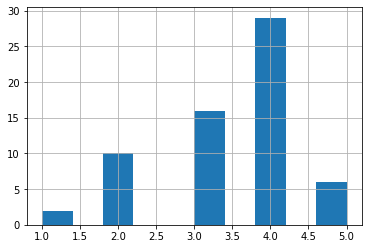

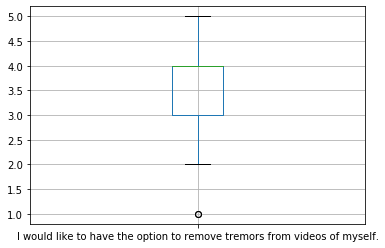

Old


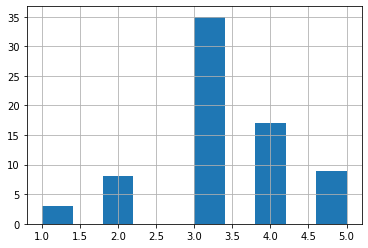

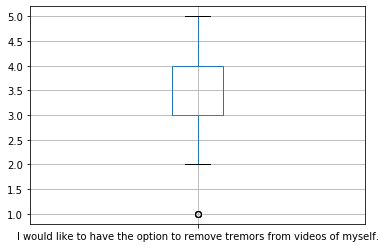

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
35-44 years old,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
45-54 years old,12.0,3.416667,1.164500,1.0,2.75,4.0,4.0,5.0
55-64 years old,50.0,3.440000,0.951047,1.0,3.00,4.0,4.0,5.0
65-74 years old,71.0,3.295775,0.976793,1.0,3.00,3.0,4.0,5.0
75-84 years old,35.0,3.200000,1.158092,1.0,3.00,3.0,4.0,5.0
85 or older,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0


p-value =  0.2421733451012376
u-value=  2338.5
Young:  [1.4704852755923319, 3.4285714285714284, 5.386657581550525]
Old:  [1.3506345613673192, 3.2916666666666665, 5.232698771966014]
There is a Difference:  False


I would like for viewers to have the option to remove tremors from a video of myself.
Young


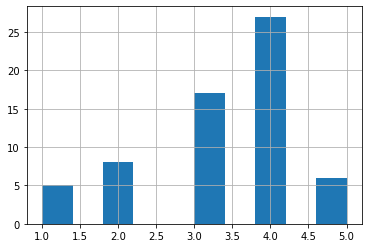

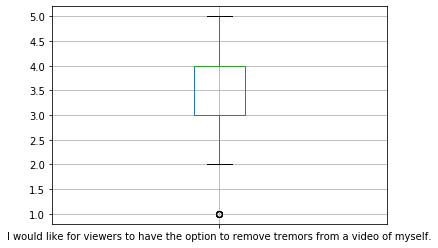

Old


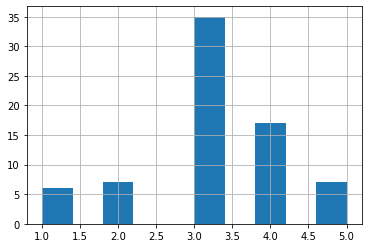

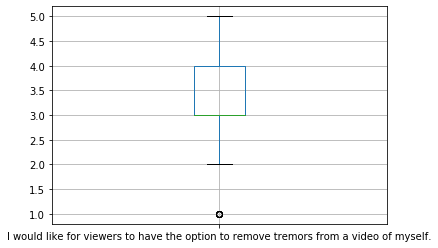

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
35-44 years old,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
45-54 years old,12.0,3.416667,1.311372,1.0,2.0,4.0,4.0,5.0
55-64 years old,50.0,3.320000,1.038838,1.0,3.0,3.5,4.0,5.0
65-74 years old,71.0,3.169014,1.027979,1.0,3.0,3.0,4.0,5.0
75-84 years old,35.0,3.457143,1.220965,1.0,3.0,4.0,4.0,5.0
85 or older,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0


p-value =  0.20001866279477193
u-value=  2305.0
Young:  [1.1780697090120347, 3.3333333333333335, 5.488596957654632]
Old:  [1.1248502977179209, 3.1666666666666665, 5.208483035615412]
There is a Difference:  False


My tremors affect my level of confidence. 
Young


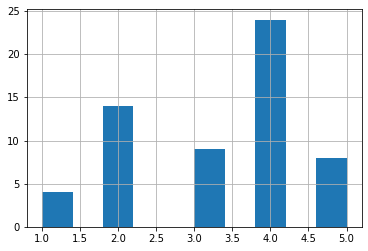

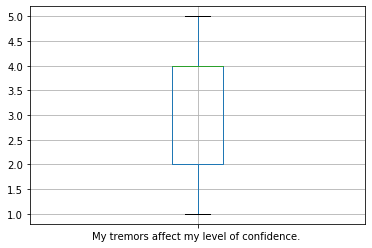

Old


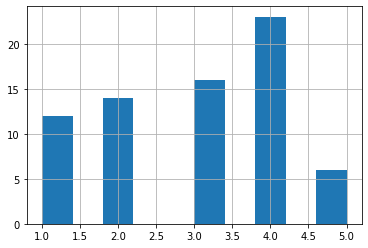

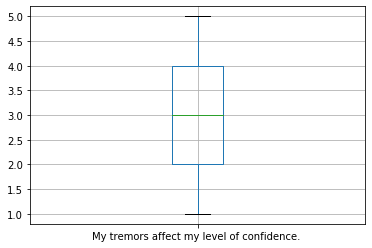

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
35-44 years old,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45-54 years old,10.0,3.700000,1.251666,1.0,4.0,4.0,4.0,5.0
55-64 years old,49.0,3.224490,1.159477,1.0,2.0,3.0,4.0,5.0
65-74 years old,70.0,2.957143,1.256124,1.0,2.0,3.0,4.0,5.0
75-84 years old,35.0,2.657143,1.136115,1.0,2.0,2.0,4.0,5.0
85 or older,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0


p-value =  0.06293667319666853
u-value=  2138.0
Young:  [0.9487510275752871, 3.305084745762712, 5.661418463950136]
Old:  [0.4634874771240556, 2.9577464788732395, 5.452005480622423]
There is a Difference:  False


I feel like my tremors cause others to perceive me as less competent. 
Young


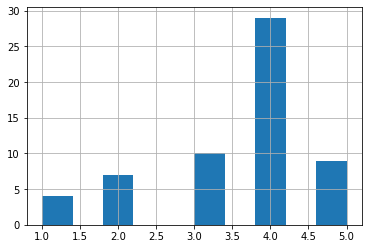

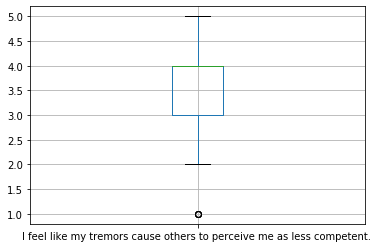

Old


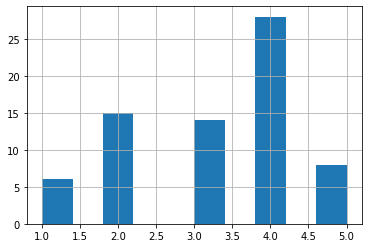

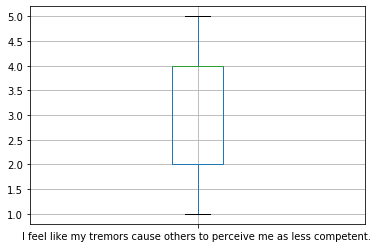

,count,mean,std,min,25%,50%,75%,max
What is your age?,,,,,,,,
35-44 years old,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45-54 years old,10.0,3.400000,1.074968,1.0,3.25,4.0,4.0,4.0
55-64 years old,49.0,3.571429,1.118034,1.0,3.00,4.0,4.0,5.0
65-74 years old,70.0,3.242857,1.172582,1.0,2.00,4.0,4.0,5.0
75-84 years old,35.0,3.028571,1.175378,1.0,2.00,3.0,4.0,5.0
85 or older,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0


p-value =  0.06344250352906804
u-value=  2143.5
Young:  [1.3351110763975154, 3.542372881355932, 5.749634686314349]
Old:  [0.9103708663093997, 3.23943661971831, 5.56850237312722]
There is a Difference:  False




In [20]:
# Age Cell
# Compute the Mann-Whitney rank test on samples x and y
# scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

g = df.groupby('What is your age?')

df_young = df[(df['What is your age?'] == '18-24 years old') | 
             (df['What is your age?'] == '25-34 years old') |
             (df['What is your age?'] == '35-44 years old') |
             (df['What is your age?'] == '45-54 years old') |
             (df['What is your age?'] == '55-64 years old')].copy()

df_old = df[(df['What is your age?'] == '65-74 years old') |
             (df['What is your age?'] == '75-74 years old') |
             (df['What is your age?'] == '85 or older')].copy()

for q in q_list:
    col_name = q
    print(col_name)
    print("Young")
    df_young[col_name].hist()
    plt.show()
    df_young.boxplot(col_name)
    plt.show()
    print("Old")
    df_old[col_name].hist()
    plt.show()
    df_old.boxplot(col_name)
    plt.show()
    display(g[col_name].describe())
    #Statistic test
    u,p = mannwhitneyu(df_young[col_name], df_old[col_name])
    print('p-value = ', p)
    print('u-value= ', u)
    mu1 = df_young[col_name].mean()
    std1 = df_young[col_name].std()
    mu2 = df_old[col_name].mean()
    std2 = df_old[col_name].std()
    print("Young: ", compute_interval95(mu1, std1))
    print("Old: ", compute_interval95(mu2, std2))
    print("There is a Difference: ", is_difference(compute_interval95(mu1, std1), compute_interval95(mu2, std2)))
    print('\n========================================\n')

In [28]:
df_white = df[(df['What is your race? (Check all that apply)'] == 'White')].copy()
df_notwhite = df[(df['What is your race? (Check all that apply)'] != 'White')].copy()
print(len(df_white), len(df_notwhite))

66 111


I would like to have the option to remove tremors from videos of myself.
White


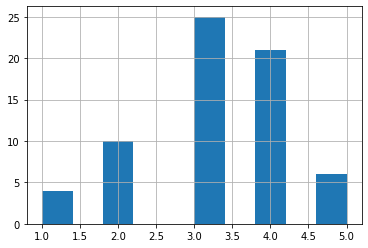

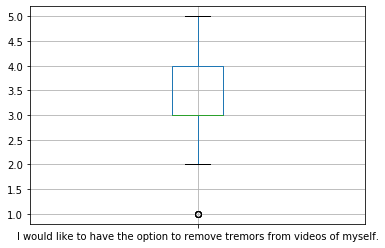

Not White


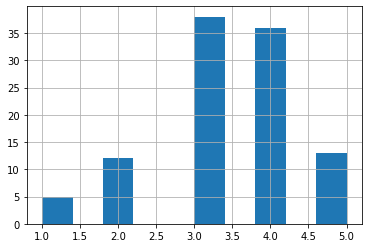

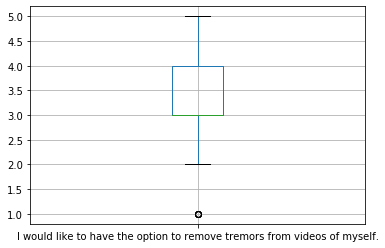

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
Asian,2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0
Black or African American,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
Other,5.0,3.400000,0.547723,3.0,3.00,3.0,4.00,4.0
White,66.0,3.227273,1.019735,1.0,3.00,3.0,4.00,5.0
White;American Indian or Alaska Native,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0


p-value =  0.04841724921192014
u-value=  4.107919181288745
White:  [1.1878020705971863, 3.227272727272727, 5.266743383948268]
Not White:  [1.368993053145093, 3.3846153846153846, 5.400237716085677]
There is a Difference:  False


I would like for viewers to have the option to remove tremors from a video of myself.
White


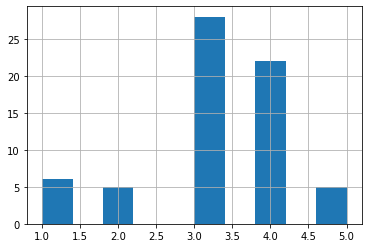

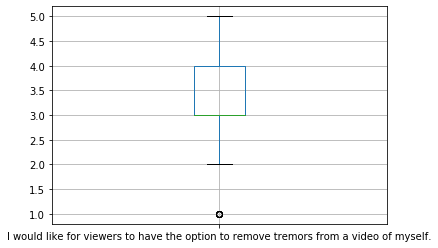

Not White


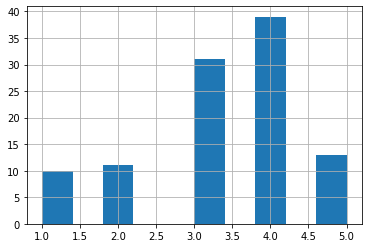

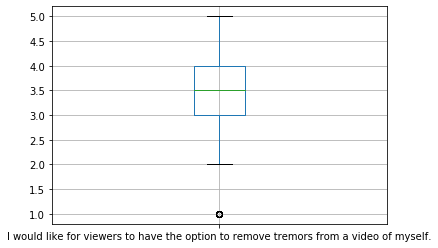

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
Asian,2.0,3.000000,1.414214,2.0,2.5,3.0,3.5,4.0
Black or African American,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
Other,5.0,3.800000,0.447214,3.0,4.0,4.0,4.0,4.0
White,66.0,3.227273,1.019735,1.0,3.0,3.0,4.0,5.0
White;American Indian or Alaska Native,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0


p-value =  0.06749092532141368
u-value=  4.107919181288745
White:  [1.1878020705971863, 3.227272727272727, 5.266743383948268]
Not White:  [1.0723948147716724, 3.326923076923077, 5.581451339074482]
There is a Difference:  False


My tremors affect my level of confidence. 
White


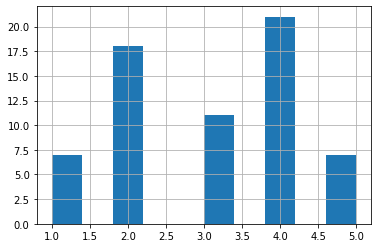

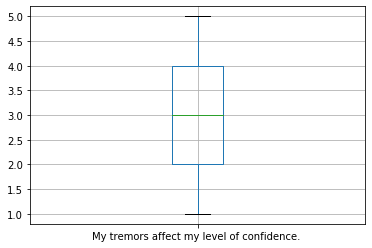

Not White


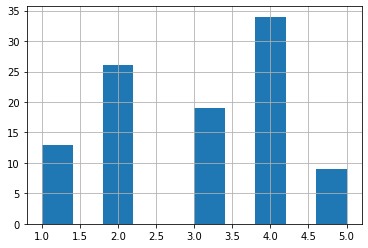

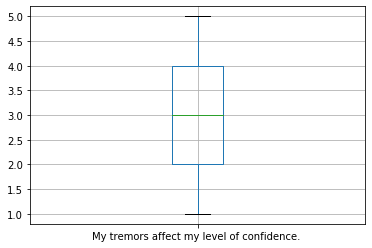

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Asian,2.0,2.500000,2.121320,1.0,1.75,2.5,3.25,4.0
Black or African American,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
Other,3.0,2.333333,0.577350,2.0,2.00,2.0,2.50,3.0
White,64.0,3.046875,1.227071,1.0,2.00,3.0,4.00,5.0
White;American Indian or Alaska Native,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0


p-value =  0.3167573973386376
u-value=  4.107919181288745
White:  [0.5927320823365929, 3.046875, 5.5010179176634075]
Not White:  [0.5668949878807124, 3.0, 5.433105012119288]
There is a Difference:  False


I feel like my tremors cause others to perceive me as less competent. 
White


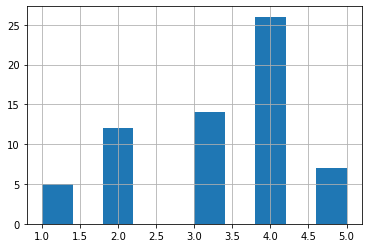

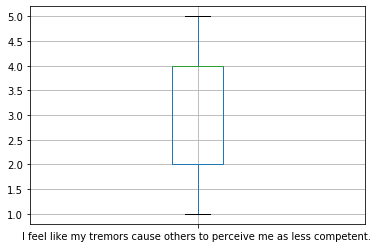

Not White


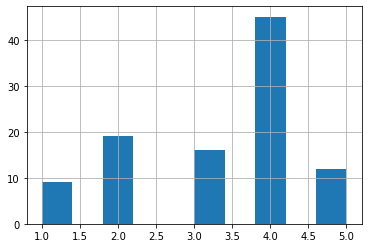

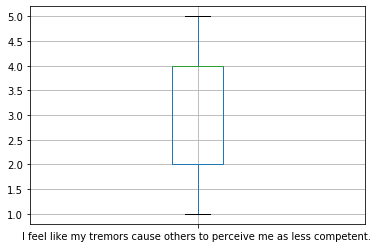

,count,mean,std,min,25%,50%,75%,max
What is your race? (Check all that apply),,,,,,,,
American Indian or Alaska Native,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Asian,2.0,2.500000,0.707107,2.0,2.25,2.5,2.75,3.0
Black or African American,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
Other,3.0,3.666667,0.577350,3.0,3.50,4.0,4.00,4.0
White,64.0,3.281250,1.133456,1.0,2.00,4.0,4.00,5.0
White;American Indian or Alaska Native,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0


p-value =  0.1726261990068968
u-value=  4.107919181288745
White:  [1.0143382485440928, 3.28125, 5.548161751455908]
Not White:  [0.9685439142727423, 3.3168316831683167, 5.665119452063891]
There is a Difference:  False




In [22]:
# Race Cell
# Compute the Mann-Whitney rank test on samples x and y
# scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)

g = df.groupby('What is your race? (Check all that apply)')

df_white = df[(df['What is your race? (Check all that apply)'] == 'White')].copy()
df_notwhite = df[(df['What is your race? (Check all that apply)'] != 'White')].copy()

for q in q_list:
    col_name = q
    print(col_name)
    print("White")
    df_white[col_name].hist()
    plt.show()
    df_white.boxplot(col_name)
    plt.show()
    print("Not White")
    df_notwhite[col_name].hist()
    plt.show()
    df_notwhite.boxplot(col_name)
    plt.show()
    display(g[col_name].describe())
    #Statistic test
    u,p = mannwhitneyu(df_white[col_name], df_notwhite[col_name])
    print('p-value = ', p)
    print('u-value= ', u)
    mu1 = df_white[col_name].mean()
    std1 = df_white[col_name].std()
    mu2 = df_notwhite[col_name].mean()
    std2 = df_notwhite[col_name].std()
    print("White: ", compute_interval95(mu1, std1))
    print("Not White: ", compute_interval95(mu2, std2))
    print("There is a Difference: ", is_difference(compute_interval95(mu1, std1), compute_interval95(mu2, std2)))
    print('\n========================================\n')

I would like to have the option to remove tremors from videos of myself.
High Education


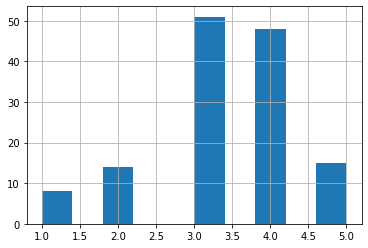

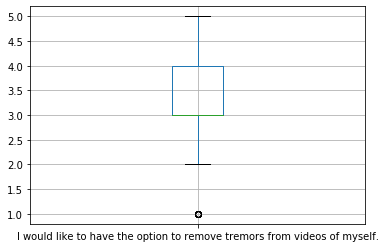

Low Education


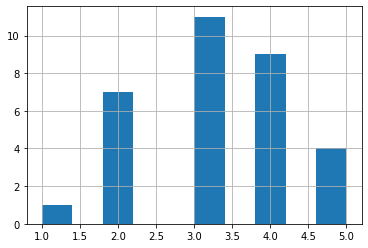

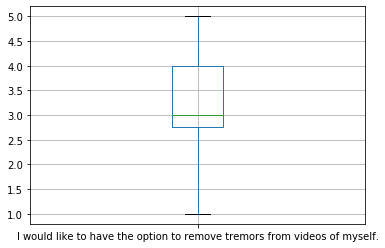

,count,mean,std,min,25%,50%,75%,max
What is the highest level of education you have obtained?,,,,,,,,
Bachelor's Degree,29.0,3.413793,0.907006,1.0,3.00,3.0,4.00,5.0
High School,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
Master's Degree,31.0,3.516129,1.150970,1.0,3.00,4.0,4.00,5.0
Ph.D. or higher,12.0,3.333333,0.984732,2.0,3.00,3.0,4.00,5.0
Prefer not to say,2.0,2.500000,0.707107,2.0,2.25,2.5,2.75,3.0
Some College,16.0,3.375000,1.204159,1.0,2.75,3.5,4.00,5.0
Trade School,3.0,2.666667,1.154701,2.0,2.00,2.0,3.00,4.0


p-value =  0.2521690158837195
u-value=  4.107919181288745
High Education:  [1.3377483373980503, 3.3529411764705883, 5.368134015543126]
Low Education:  [1.1554602476454288, 3.25, 5.344539752354571]
There is a Difference:  False


I would like for viewers to have the option to remove tremors from a video of myself.
High Education


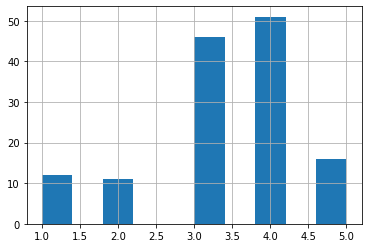

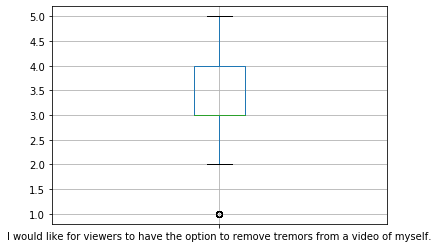

Low Education


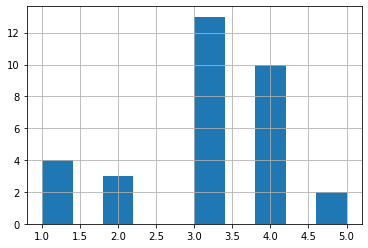

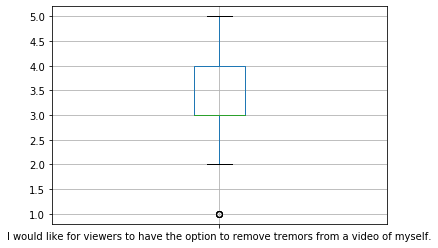

,count,mean,std,min,25%,50%,75%,max
What is the highest level of education you have obtained?,,,,,,,,
Bachelor's Degree,29.0,3.379310,0.978840,1.0,3.0,3.0,4.0,5.0
High School,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
Master's Degree,31.0,3.419355,1.360740,1.0,3.0,4.0,4.0,5.0
Ph.D. or higher,12.0,3.000000,1.206045,1.0,2.0,3.0,4.0,5.0
Prefer not to say,2.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
Some College,16.0,3.375000,0.885061,1.0,3.0,3.0,4.0,5.0
Trade School,3.0,3.333333,1.154701,2.0,3.0,4.0,4.0,4.0


p-value =  0.1056961384515831
u-value=  4.107919181288745
High Education:  [1.195721954592147, 3.3529411764705883, 5.510160398349029]
Low Education:  [0.9170774876990677, 3.09375, 5.270422512300932]
There is a Difference:  False


My tremors affect my level of confidence. 
High Education


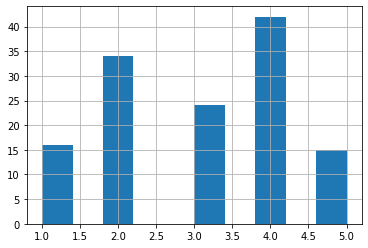

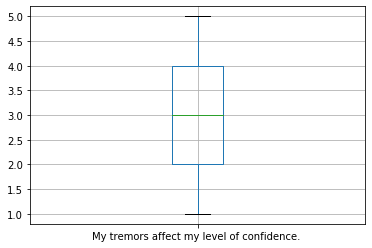

Low Education


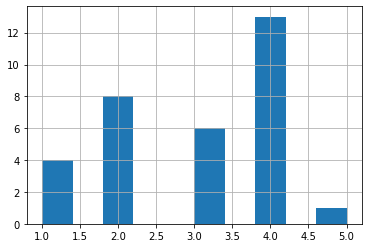

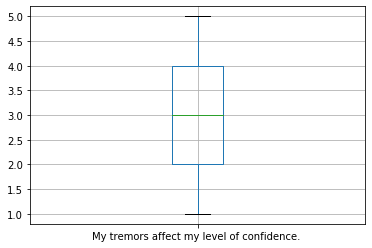

,count,mean,std,min,25%,50%,75%,max
What is the highest level of education you have obtained?,,,,,,,,
Bachelor's Degree,29.0,2.862069,1.274030,1.0,2.0,3.0,4.0,5.0
High School,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0
Master's Degree,31.0,3.290323,1.160274,1.0,2.0,3.0,4.0,5.0
Ph.D. or higher,12.0,3.166667,1.403459,1.0,2.0,3.5,4.0,5.0
Prefer not to say,2.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
Some College,16.0,2.875000,1.204159,1.0,2.0,3.0,4.0,4.0
Trade School,3.0,3.333333,1.154701,2.0,3.0,4.0,4.0,4.0


p-value =  0.26460396216709264
u-value=  4.107919181288745
High Education:  [0.5668117148435301, 3.045801526717557, 5.524791338591584]
Low Education:  [0.6695565930460212, 2.96875, 5.267943406953979]
There is a Difference:  False


I feel like my tremors cause others to perceive me as less competent. 
High Education


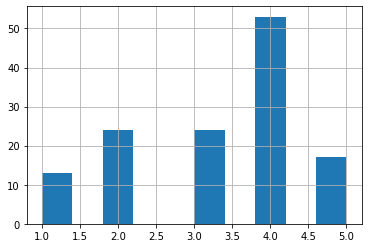

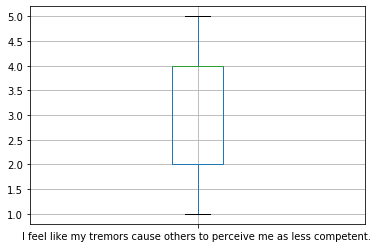

Low Education


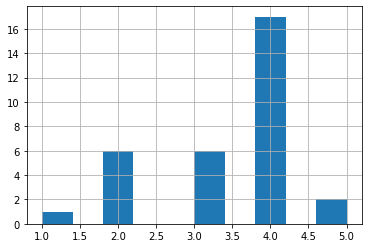

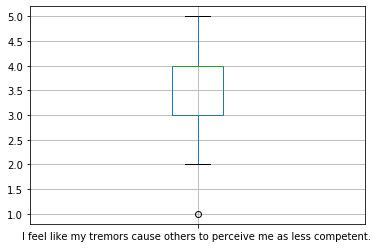

,count,mean,std,min,25%,50%,75%,max
What is the highest level of education you have obtained?,,,,,,,,
Bachelor's Degree,29.0,3.206897,1.292266,1.0,2.0,4.0,4.00,5.0
High School,1.0,4.000000,NaN,4.0,4.0,4.0,4.00,4.0
Master's Degree,31.0,3.290323,1.243478,1.0,2.0,4.0,4.00,5.0
Ph.D. or higher,12.0,3.583333,1.240112,1.0,3.0,4.0,4.25,5.0
Prefer not to say,2.0,3.000000,1.414214,2.0,2.5,3.0,3.50,4.0
Some College,16.0,3.125000,1.024695,1.0,2.0,3.5,4.00,4.0
Trade School,3.0,4.333333,0.577350,4.0,4.0,4.0,4.50,5.0


p-value =  0.48565503132663634
u-value=  4.107919181288745
High Education:  [0.8866154888721924, 3.282442748091603, 5.6782700073110135]
Low Education:  [1.4480167607369039, 3.40625, 5.364483239263096]
There is a Difference:  False




In [34]:
# level of education
g = df.groupby('What is the highest level of education you have obtained?')

df_lowedu = df[(df['What is the highest level of education you have obtained?'] == 'Trade School') |
             (df['What is the highest level of education you have obtained?'] == 'Some High School') | 
             (df['What is the highest level of education you have obtained?'] == 'High School') |
             (df['What is the highest level of education you have obtained?'] == 'Some College') |
             (df['What the highest level of education you have obtained?'] == 'Trade School') |
             (df['What the highest level of education you have obtained?'] == 'Some High School') | 
             (df['What the highest level of education you have obtained?'] == 'High School') |
             (df['What the highest level of education you have obtained?'] == 'Some College')].copy()

df_highedu = df[(df['What is the highest level of education you have obtained?'] == "Bachelor's Degree") | 
             (df['What is the highest level of education you have obtained?'] == "Master's Degree") |
             (df['What is the highest level of education you have obtained?'] == 'Ph.D. or higher') |
             (df['What the highest level of education you have obtained?'] == "Bachelor's Degree") | 
             (df['What the highest level of education you have obtained?'] == "Master's Degree") |
             (df['What the highest level of education you have obtained?'] == 'Ph.D. or higher')].copy()

for q in q_list:
    col_name = q
    print(col_name)
    print("High Education")
    df_highedu[col_name].hist()
    plt.show()
    df_highedu.boxplot(col_name)
    plt.show()
    print("Low Education")
    df_lowedu[col_name].hist()
    plt.show()
    df_lowedu.boxplot(col_name)
    plt.show()
    display(g[col_name].describe())
    #Statistic test
    u,p = mannwhitneyu(df_highedu[col_name], df_lowedu[col_name])
    print('p-value = ', p)
    print('u-value= ', t)
    mu1 = df_highedu[col_name].mean()
    std1 = df_highedu[col_name].std()
    mu2 = df_lowedu[col_name].mean()
    std2 = df_lowedu[col_name].std()
    print("High Education: ", compute_interval95(mu1, std1))
    print("Low Education: ", compute_interval95(mu2, std2))
    print("There is a Difference: ", is_difference(compute_interval95(mu1, std1), compute_interval95(mu2, std2)))
    print('\n========================================\n')

I would like to have the option to remove tremors from videos of myself.
High Frequency of Video Calls/Posts


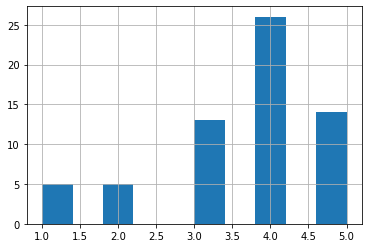

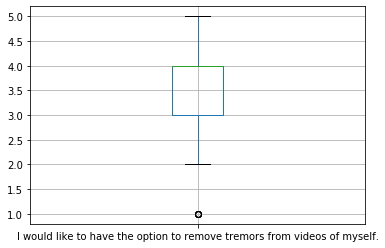

Low Frequency of Video Calls/Posts


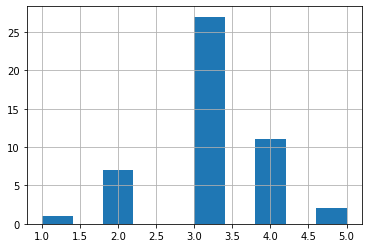

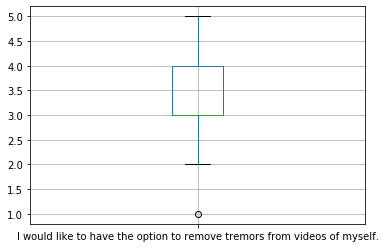

,count,mean,std,min,25%,50%,75%,max
How often do you make video calls or post videos online?,,,,,,,,
Always,6.0,3.833333,1.471960,1.0,4.0,4.0,4.75,5.0
Never,15.0,2.933333,0.703732,1.0,3.0,3.0,3.00,4.0
Rarely,33.0,3.212121,0.819969,2.0,3.0,3.0,4.00,5.0
Sometimes,54.0,3.111111,0.964789,1.0,3.0,3.0,4.00,5.0
Very Often,57.0,3.596491,1.131681,1.0,3.0,4.0,4.00,5.0


p-value =  0.0008578850260571149
u-value=  1008.5
High Frequency:  [1.3069874728110067, 3.619047619047619, 5.9311077652842314]
Low Frequency:  [1.547228881577667, 3.125, 4.7027711184223335]
There is a Difference:  False


I would like for viewers to have the option to remove tremors from a video of myself.
High Frequency of Video Calls/Posts


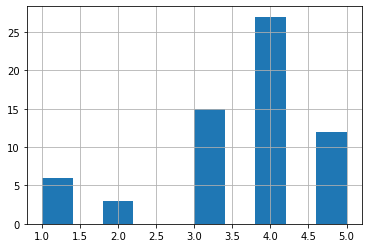

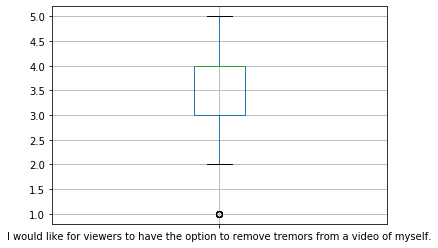

Low Frequency of Video Calls/Posts


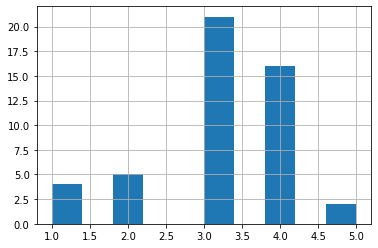

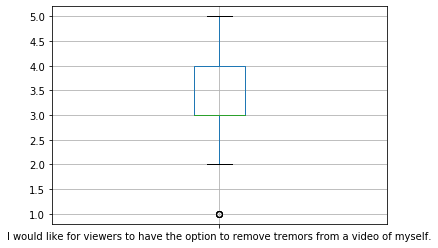

,count,mean,std,min,25%,50%,75%,max
How often do you make video calls or post videos online?,,,,,,,,
Always,6.0,4.000000,1.549193,1.0,4.00,4.5,5.0,5.0
Never,15.0,2.933333,1.032796,1.0,2.50,3.0,4.0,4.0
Rarely,33.0,3.242424,0.936426,1.0,3.00,3.0,4.0,5.0
Sometimes,54.0,3.037037,1.063333,1.0,2.25,3.0,4.0,5.0
Very Often,57.0,3.526316,1.103651,1.0,3.00,4.0,4.0,5.0


p-value =  0.0059924832915566875
u-value=  1110.0
High Frequency:  [1.2793866387410047, 3.5714285714285716, 5.863470504116139]
Low Frequency:  [1.2111737246635192, 3.1458333333333335, 5.080492942003148]
There is a Difference:  False


My tremors affect my level of confidence. 
High Frequency of Video Calls/Posts


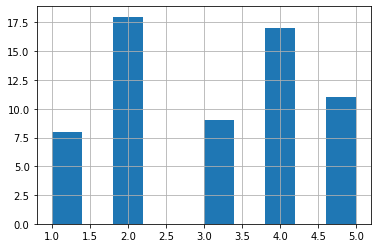

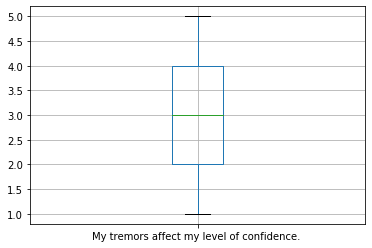

Low Frequency of Video Calls/Posts


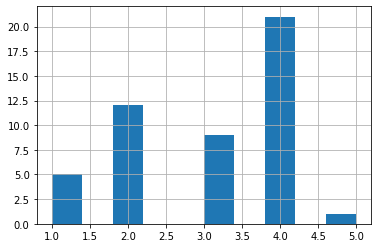

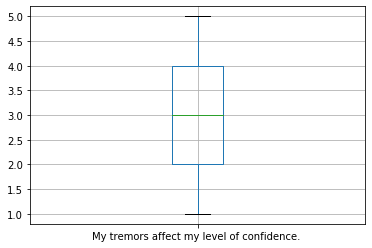

,count,mean,std,min,25%,50%,75%,max
How often do you make video calls or post videos online?,,,,,,,,
Always,6.0,3.333333,1.505545,1.0,2.5,4.0,4.0,5.0
Never,15.0,3.266667,1.162919,1.0,2.0,4.0,4.0,5.0
Rarely,33.0,2.909091,1.071320,1.0,2.0,3.0,4.0,4.0
Sometimes,54.0,2.944444,1.188255,1.0,2.0,3.0,4.0,5.0
Very Often,57.0,3.052632,1.328547,1.0,2.0,3.0,4.0,5.0


p-value =  0.3978908929339447
u-value=  1469.5
High Frequency:  [0.40809409272299435, 3.0793650793650795, 5.750636066007164]
Low Frequency:  [0.8187228047399464, 3.0208333333333335, 5.222943861926721]
There is a Difference:  False


I feel like my tremors cause others to perceive me as less competent. 
High Frequency of Video Calls/Posts


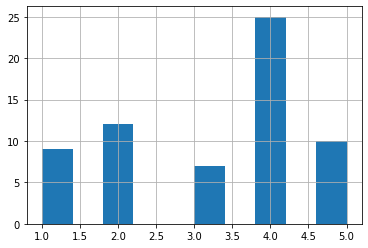

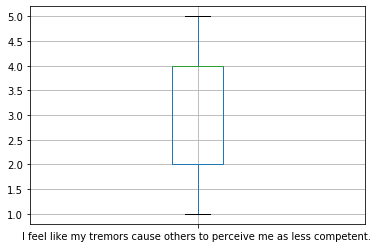

Low Frequency of Video Calls/Posts


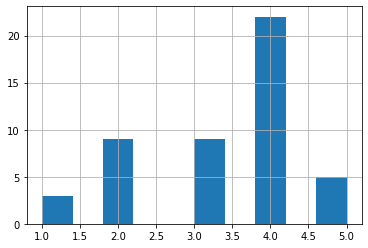

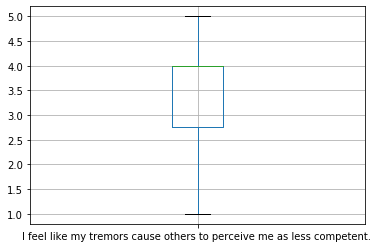

,count,mean,std,min,25%,50%,75%,max
How often do you make video calls or post videos online?,,,,,,,,
Always,6.0,3.666667,1.366260,1.0,4.0,4.0,4.0,5.0
Never,15.0,3.400000,1.242118,1.0,3.0,4.0,4.0,5.0
Rarely,33.0,3.333333,1.050793,1.0,2.0,4.0,4.0,5.0
Sometimes,54.0,3.333333,0.990521,1.0,3.0,4.0,4.0,5.0
Very Often,57.0,3.192982,1.328783,1.0,2.0,4.0,4.0,5.0


p-value =  0.4075285378079062
u-value=  1474.0
High Frequency:  [0.5810465305813195, 3.238095238095238, 5.895143945609156]
Low Frequency:  [1.1520561380732803, 3.3541666666666665, 5.556277195260053]
There is a Difference:  False




In [24]:
# Frequency of video calls Cell
g = df.groupby('How often do you make video calls or post videos online?')

df_highcalls = df[(df['How often do you make video calls or post videos online?'] == 'Always') |
             (df['How often do you make video calls or post videos online?'] == 'Very Often')]

df_lowcalls = df[(df['How often do you make video calls or post videos online?'] == 'Rarely') |
             (df['How often do you make video calls or post videos online?'] == 'Never')]

for q in q_list:
    col_name = q
    print(col_name)
    print("High Frequency of Video Calls/Posts")
    df_highcalls[col_name].hist()
    plt.show()
    df_highcalls.boxplot(col_name)
    plt.show()
    print("Low Frequency of Video Calls/Posts")
    df_lowcalls[col_name].hist()
    plt.show()
    df_lowcalls.boxplot(col_name)
    plt.show()
    display(g[col_name].describe())
    #Statistic test
    u,p = mannwhitneyu(df_highcalls[col_name], df_lowcalls[col_name])
    print('p-value = ', p)
    print('u-value= ', u)
    mu1 = df_highcalls[col_name].mean()
    std1 = df_highcalls[col_name].std()
    mu2 = df_lowcalls[col_name].mean()
    std2 = df_lowcalls[col_name].std()
    print("High Frequency: ", compute_interval95(mu1, std1))
    print("Low Frequency: ", compute_interval95(mu2, std2))
    print("There is a Difference: ", is_difference(compute_interval95(mu1, std1), compute_interval95(mu2, std2)))
    print('\n========================================\n')

I would like to have the option to remove tremors from videos of myself.
Long Duration of PD


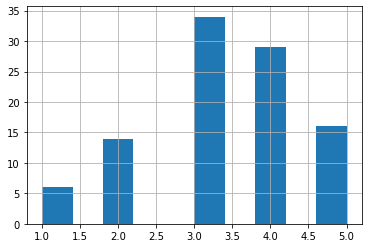

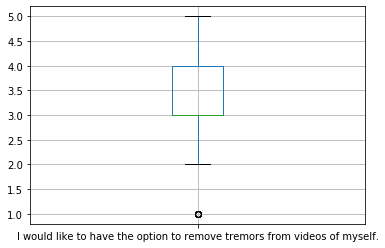

Short Duration of PD


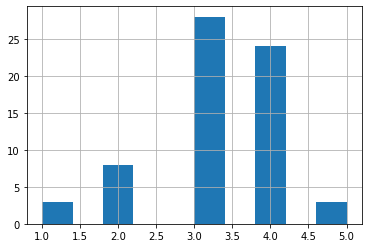

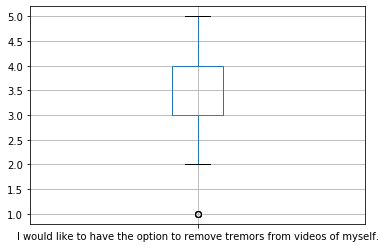

,count,mean,std,min,25%,50%,75%,max
How long have you been diagnosed with Parkinson's Disease?,,,,,,,,
1-3 years,23.0,3.043478,0.824525,1.0,3.00,3.0,4.00,4.0
10 or more years,57.0,3.473684,1.151168,1.0,3.00,4.0,4.00,5.0
2008,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
2013,2.0,4.000000,0.000000,4.0,4.00,4.0,4.00,4.0
2014,2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0
4-6 years,40.0,3.325000,0.944281,1.0,3.00,3.0,4.00,5.0
7-9 years,42.0,3.190476,1.017843,1.0,3.00,3.0,4.00,5.0
less than 1 year,3.0,3.666667,0.577350,3.0,3.50,4.0,4.00,4.0


p-value =  0.242217356802152
u-value=  3066.0
Long:  [1.1531062430072048, 3.3535353535353534, 5.553964464063502]
Short:  [1.451486162126877, 3.242424242424242, 5.033362322721607]
There is a Difference:  False


I would like for viewers to have the option to remove tremors from a video of myself.
Long Duration of PD


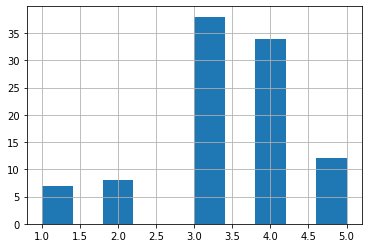

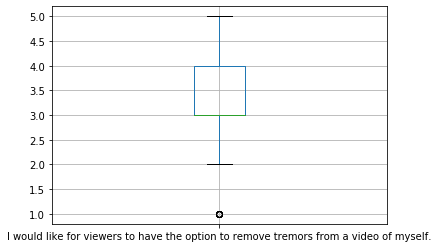

Short Duration of PD


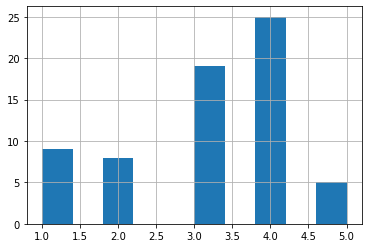

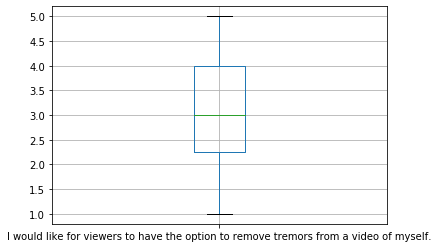

,count,mean,std,min,25%,50%,75%,max
How long have you been diagnosed with Parkinson's Disease?,,,,,,,,
1-3 years,23.0,2.869565,1.099766,1.0,2.0,3.0,4.0,5.0
10 or more years,57.0,3.491228,1.019853,1.0,3.0,4.0,4.0,5.0
2008,1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
2013,2.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
2014,2.0,4.000000,1.414214,3.0,3.5,4.0,4.5,5.0
4-6 years,40.0,3.250000,1.214232,1.0,3.0,4.0,4.0,5.0
7-9 years,42.0,3.190476,1.041530,1.0,3.0,3.0,4.0,5.0
less than 1 year,3.0,3.666667,0.577350,3.0,3.5,4.0,4.0,4.0


p-value =  0.15935072583753174
u-value=  2980.5
Long:  [1.294336068711739, 3.3636363636363638, 5.432936658560989]
Short:  [0.8122727170150403, 3.1363636363636362, 5.460454555712232]
There is a Difference:  False


My tremors affect my level of confidence. 
Long Duration of PD


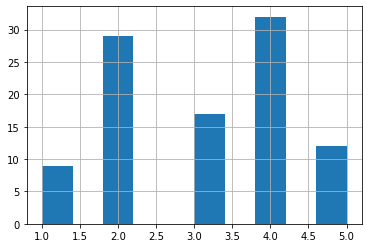

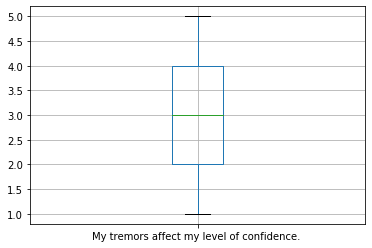

Short Duration of PD


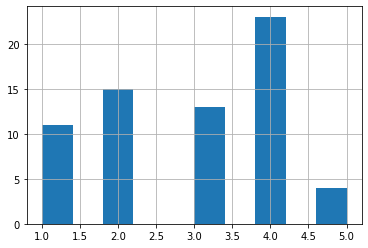

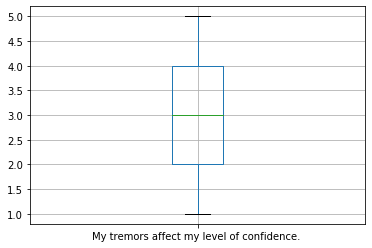

,count,mean,std,min,25%,50%,75%,max
How long have you been diagnosed with Parkinson's Disease?,,,,,,,,
1-3 years,23.0,2.782609,1.085295,1.0,2.0,3.0,4.0,4.0
10 or more years,57.0,3.315789,1.269954,1.0,2.0,4.0,4.0,5.0
2008,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4-6 years,40.0,2.975000,1.329883,1.0,2.0,3.0,4.0,5.0
7-9 years,42.0,2.785714,1.071487,1.0,2.0,3.0,4.0,5.0
less than 1 year,3.0,3.000000,1.000000,2.0,2.5,3.0,3.5,4.0


p-value =  0.1902406275566491
u-value=  3011.5
Long:  [0.6650129326437662, 3.090909090909091, 5.516805249174416]
Short:  [0.4601722095006595, 2.909090909090909, 5.358009608681159]
There is a Difference:  False


I feel like my tremors cause others to perceive me as less competent. 
Long Duration of PD


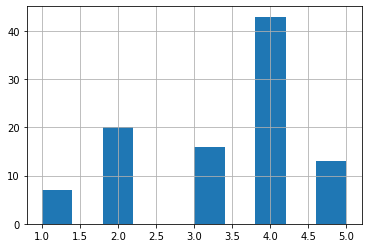

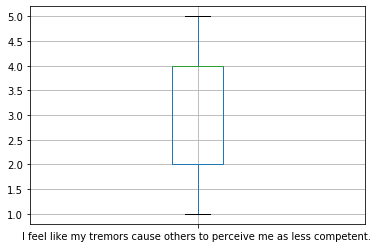

Short Duration of PD


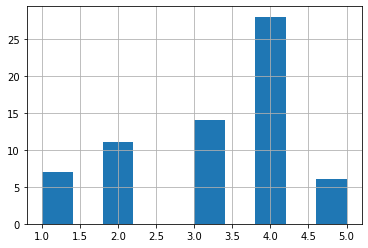

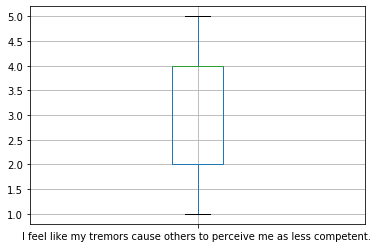

,count,mean,std,min,25%,50%,75%,max
How long have you been diagnosed with Parkinson's Disease?,,,,,,,,
1-3 years,23.0,3.130435,1.099766,1.0,2.00,3.0,4.0,5.0
10 or more years,57.0,3.631579,1.143797,1.0,3.00,4.0,4.0,5.0
2008,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4-6 years,40.0,3.275000,1.219237,1.0,2.75,4.0,4.0,5.0
7-9 years,42.0,2.976190,1.070402,1.0,2.00,3.0,4.0,5.0
less than 1 year,3.0,3.333333,1.154701,2.0,3.00,4.0,4.0,4.0


p-value =  0.2379103176907693
u-value=  3062.5
Long:  [1.0444913546416457, 3.3535353535353534, 5.662579352429061]
Short:  [0.9055901929434111, 3.227272727272727, 5.5489552616020426]
There is a Difference:  False




In [28]:
g = df.groupby("How long have you been diagnosed with Parkinson's Disease?")

df_short = df[(df["How long have you been diagnosed with Parkinson's Disease?"] == 'less than 1 year') |
             (df["How long have you been diagnosed with Parkinson's Disease?"] == '1-3 years') |
             (df["How long have you been diagnosed with Parkinson's Disease?"] == '4-6 years')]

df_long = df[(df["How long have you been diagnosed with Parkinson's Disease?"] == '7-9 years') |
             (df["How long have you been diagnosed with Parkinson's Disease?"] == '10 or more years')]

for q in q_list:
    col_name = q
    print(col_name)
    print("Long Duration of PD")
    df_long[col_name].hist()
    plt.show()
    df_long.boxplot(col_name)
    plt.show()
    print("Short Duration of PD")
    df_short[col_name].hist()
    plt.show()
    df_short.boxplot(col_name)
    plt.show()
    display(g[col_name].describe())
    #Statistic test
    u,p = mannwhitneyu(df_long[col_name], df_short[col_name])
    print('p-value = ', p)
    print('u-value= ', u)
    mu1 = df_long[col_name].mean()
    std1 = df_long[col_name].std()
    mu2 = df_short[col_name].mean()
    std2 = df_short[col_name].std()
    print("Long: ", compute_interval95(mu1, std1))
    print("Short: ", compute_interval95(mu2, std2))
    print("There is a Difference: ", is_difference(compute_interval95(mu1, std1), compute_interval95(mu2, std2)))
    print('\n========================================\n')